In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import keras.backend as K

np.set_printoptions(suppress=True)
%matplotlib inline

In [10]:
df = pd.read_csv('tc_bmi.csv')
df.head()

ID     TC   BMI BMI_cat  Obese
0   1  158.0  20.2  Normal      0
1   2  181.0  21.7  Normal      0
2   3  192.0  22.0  Normal      0
3   4  164.0  22.8  Normal      0
4   5  201.5  24.6  Normal      0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
ID         20 non-null int64
TC         20 non-null float64
BMI        20 non-null float64
BMI_cat    20 non-null object
Obese      20 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 880.0+ bytes


In [12]:
x = df.BMI
y = df.TC

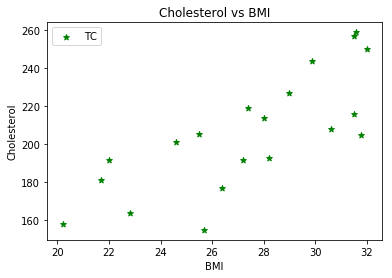

In [13]:
plt.scatter(x, y, color='green', marker='*');
plt.title('Cholesterol vs BMI');
plt.ylabel('Cholesterol');
plt.xlabel('BMI');
plt.legend();

In [21]:
model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(1,), name='Neuron'))

sgd = optimizers.SGD(lr=0.001)
model.compile(loss='mse', optimizer=sgd, metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neuron (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x, y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
20/20 - 0s - loss: 42263.1973 - mse: 42263.1953
Epoch 2/10
20/20 - 0s - loss: 3410.1946 - mse: 3410.1946
Epoch 3/10
20/20 - 0s - loss: 400.6209 - mse: 400.6209
Epoch 4/10
20/20 - 0s - loss: 422.1853 - mse: 422.1853
Epoch 5/10
20/20 - 0s - loss: 452.9368 - mse: 452.9368
Epoch 6/10
20/20 - 0s - loss: 404.2589 - mse: 404.2589
Epoch 7/10
20/20 - 0s - loss: 413.2140 - mse: 413.2140
Epoch 8/10
20/20 - 0s - loss: 460.0255 - mse: 460.0255
Epoch 9/10
20/20 - 0s - loss: 388.6287 - mse: 388.6287
Epoch 10/10
20/20 - 0s - loss: 463.4030 - mse: 463.4030


In [23]:
y_hat = model.predict(x)

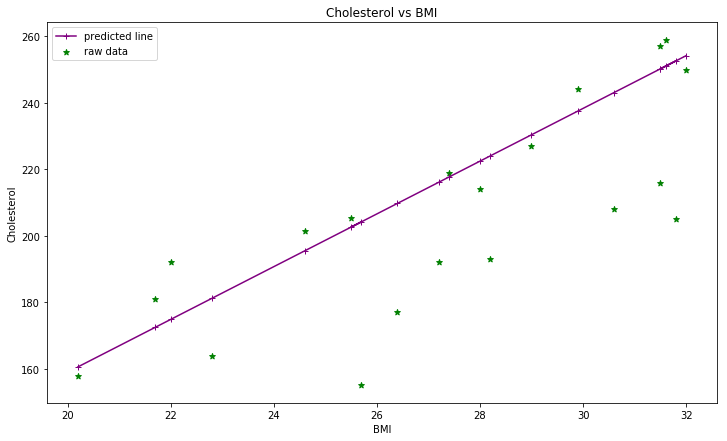

In [24]:
plt.figure(figsize=(12,7))
plt.scatter(x, y, color='green', marker='*', label='raw data');
plt.plot(x, y_hat, color='purple', marker='+', label='predicted line');
plt.title('Cholesterol vs BMI');
plt.ylabel('Cholesterol');
plt.xlabel('BMI')
plt.legend();

In [25]:
history.model.get_weights()

[array([[7.931721]], dtype=float32), array([0.35810354], dtype=float32)]

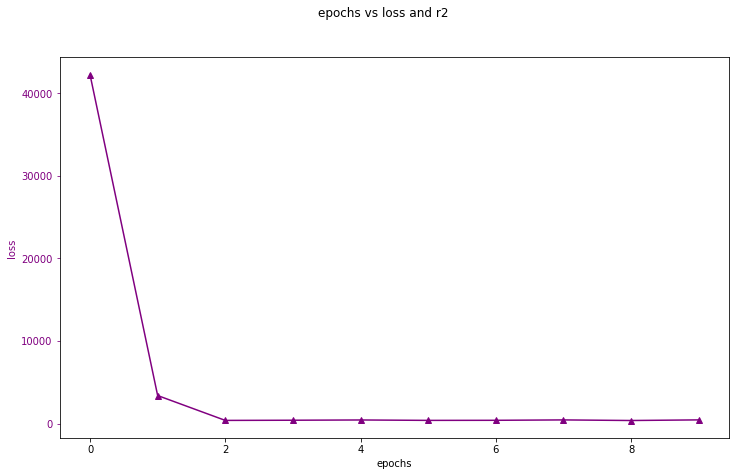

In [27]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

fig.suptitle('epochs vs loss and r2');

In [29]:
history.history

{'loss': [42263.197265625,
  3410.194580078125,
  400.62091064453125,
  422.18531799316406,
  452.93677520751953,
  404.2588653564453,
  413.2139587402344,
  460.0254669189453,
  388.62872314453125,
  463.4030303955078],
 'mse': [42263.195,
  3410.1946,
  400.6209,
  422.1853,
  452.93677,
  404.25885,
  413.21396,
  460.02548,
  388.62872,
  463.403]}